# Advanced Lane Lines Detection Pipeline

## Importing Packages

In [115]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2

%matplotlib inline

## Defining Helper Functions

In [146]:
def plotImages(images, titles=[""], columns=1, figsize=(20,10)):
    # the number of titles must match the number of columns OR
    # match the number of images
    plt.figure(figsize=figsize)
    
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        
        if len(images) == len(titles):
            plt.gca().set_title(titles[i])
        else:
            plt.gca().set_title(titles[i % columns])
        
        plt.imshow(image)

## Calibrating the Camera

In [134]:
# globals used internally by the calibrateCamera function
gCamCalMatrix = None
gCamCalDistortionCoeff = None 

def calibrateCamera(debug=False):
    # return if the global camCalMatrix already exists
    global gCamCalMatrix
    global gCamCalDistortionCoeff
    
    if(gCamCalMatrix is not None):
        return gCamCalMatrix, gCamCalDistortionCoeff
    
    # keep track of one of the grayscaled calibration images
    grayImage = None
    
    # keep track of images
    images = []
    
    # create object points and image points arrays for all images
    objectPoints = [] # 3D Points to hold position in real world space
    imagePoints  = [] # 2D Points to hold position in the image plane
    
    # prepare object points
    objectPoint = np.zeros((9*6, 3), np.float32)
    objectPoint[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2) # reshape to X, Y coordinates
    
    # use calibration images
    for fileName in glob.glob("camera_cal/*.jpg"):
        # read in image
        image = mpimg.imread(fileName)
        # convert to gray scale
        grayImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        # find chessboard corners for a 9x6 board
        ret, corners = cv2.findChessboardCorners(grayImage, (9,6), None)
    
        # append object and image points if corners found
        if ret:
            objectPoints.append(objectPoint)
            imagePoints.append(corners)
            
            # if debug enabled, show visualization of chessboard corners
            if debug:
                images.append(cv2.drawChessboardCorners(image, (9, 6), corners, ret))
    
    if grayImage is not None:
        ret, gCamCalMatrix, gCamCalDistortionCoeff, rVecs, tVecs = cv2.calibrateCamera(objectPoints, 
                                                                                       imagePoints, 
                                                                                       grayImage.shape[::-1], 
                                                                                       None, None)
    # if debug enabled, show visualization of undistorted images
    if debug:
        pass
        ## uncomment if debugging this section
        #for image in images:
        #    undistortedImage = cv2.undistort(image, gCamCalMatrix, gCamCalDistortionCoeff, None, gCamCalMatrix)
        #    
        #    plotImages([image, undistortedImage], 2)
    
    return gCamCalMatrix, gCamCalDistortionCoeff

## Correcting Image Distortion

In [119]:
def distortionCorrection(img, mtx, dist):
    # use the camera calibration matrix and distortion coefficients to 
    # undistort an image
    correctedImage = cv2.undistort(img, mtx, dist, None, mtx)
    return correctedImage

## Accentuating Lane Lines

In [120]:
def colorTransform(img):
    # TODO: pass in type
    return img

In [121]:
def sobelGradientBinary(img):
    # TODO: pass in parameters for threshes
    return img

In [122]:
def whiteAndYellowBinary(img):
    # TODO: highlight the white and yellow parts of image
    # TODO: pass in type
    return img

In [123]:
def accentuateLaneLines(img):
    # TODO: put this function in a different file
    colorTransformImage = colorTransform(img)
    sobelGradientBinaryImage = sobelGradientBinary(img)
    whiteAndYellowBinaryImage = whiteAndYellowBinary(colorTransformImage)
    
    # TODO: combine these images together for the final result
    combinedBinary = img
    
    return combinedBinary

## Applying a Bird's Eye View Perspective Transform

In [124]:
def birdsEyeView(img):
    birdsEyeViewImage = img
    
    # TODO: use source and destination points from example writeup
    
    return birdsEyeViewImage

## Identifying Lane Lines from a Bird's Eye View Image

In [125]:
def identifyLaneLines(img):
    # TODO: run function to detect
    # TODO: run function to use previous
    # TODO: move this functions and it's dependent functions
    # to a separate notebook
    binaryPerspectiveImage = img
    
    # TODO: getRadiusOfCurvature function
    radiusOfCurvature = img
    
    return binaryPerspectiveImage, radiusOfCurvature

## Reversing The Bird's Eye View Perspective Transform

In [126]:
def birdsEyeViewToOriginal(img):
    # TODO: add parameters (inversion matrix)
    originalImage = img
    return originalImage

## Adding Detected Lines Overlay to Original Image

In [127]:
def overlayDetectedLines(img, binaryDetectedLines):
    # TODO: add weight parameter
    overlayedImage = img
    
    return img

## Running the Lane Line Detection Pipeline

In [148]:
def pipeline(img, debug=False):
    # We must calibarate our camera with the provided chessboard images
    # (initializes on first call, uses globals on successive calls)
    camCalMatrix, camCalDistortionCoeff = calibrateCamera()
    
    # Apply distortion correction to the image with the computed
    # camera calibration matrix and distortion coefficients
    distortionCorrectedImage = distortionCorrection(img, camCalMatrix, camCalDistortionCoeff)
    
    # Accentuate possible lane lines via color transform, gradients, and color highlighting (white and yellow)
    binaryImage = accentuateLaneLines(distortionCorrectedImage)
    
    # Apply a perspective transform (birds-eye view) to the binary image
    binaryBirdsEyeViewImage = birdsEyeView(binaryImage)
    
    # Identify left and right lane lines on the perspective transformed binary image
    binaryLinesBirdsEyeViewImage, radiusOfCurvature = identifyLaneLines(binaryBirdsEyeViewImage)
    
    # TODO: positionFromLaneCenter
    
    # Transform the birds eye view image back to the original perspective
    binaryLinesImage = birdsEyeViewToOriginal(binaryLinesBirdsEyeViewImage)
    
    # Overlay the original image with the detected lane lines binary image
    detectedLinesOverlayImage = overlayDetectedLines(img, binaryLinesImage)
    
    if debug:
        plotImages([img, 
                    distortionCorrectedImage, 
                    binaryImage, 
                    binaryBirdsEyeViewImage, 
                    binaryLinesBirdsEyeViewImage,
                    binaryLinesImage,
                    detectedLinesOverlayImage],
                  ["img", 
                    "distortionCorrectedImage", 
                    "binaryImage", 
                    "binaryBirdsEyeViewImage", 
                    "binaryLinesBirdsEyeViewImage",
                    "binaryLinesImage",
                    "detectedLinesOverlayImage"],  
                  columns=1, figsize=(30,40))
    
    return detectedLinesOverlayImage

## Testing the Lane Line Detection Pipeline

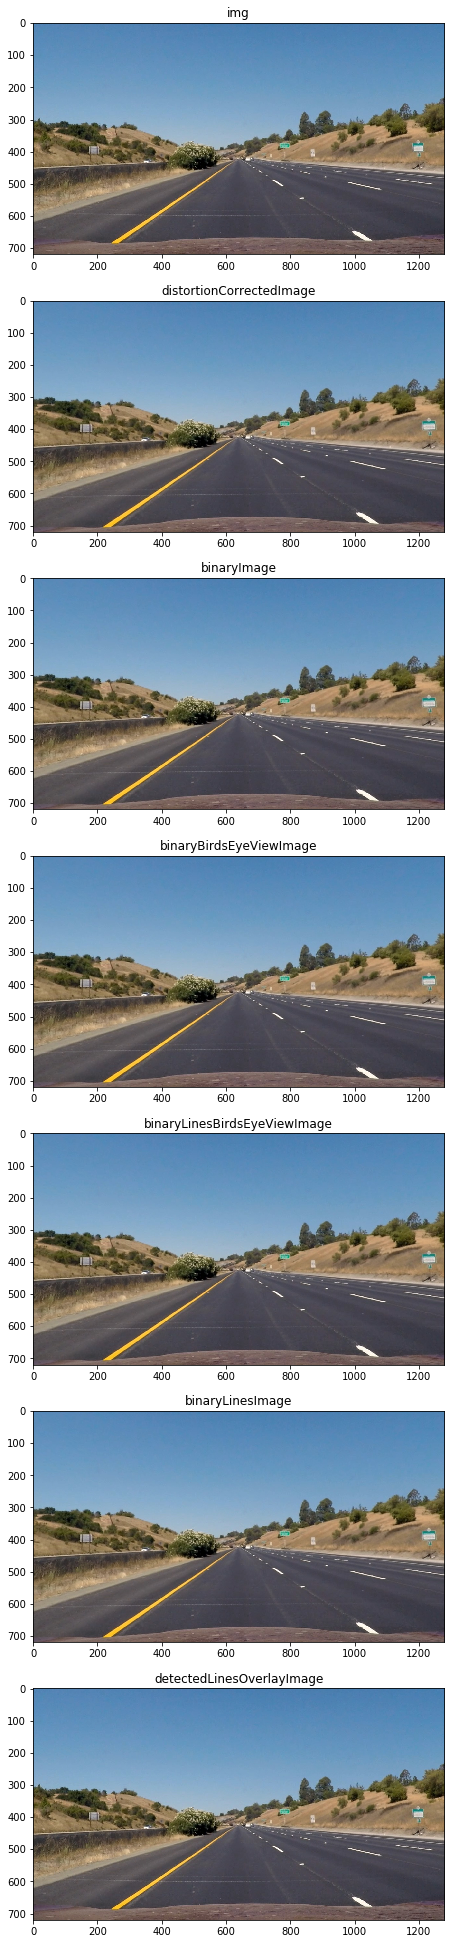

In [149]:
result = pipeline(mpimg.imread("test_images/straight_lines1.jpg"), True)

## Applying Pipeline To a Video

In [151]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import display, HTML

def pipelineVideo(inputPath, outputPath, subclip=False): 
    videoClip = None
    
    # apply subclip if subclip flag is set
    if subclip:
        videoClip = VideoFileClip(inputPath).subclip(0,5)
    else:
        videoClip = VideoFileClip(inputPath)
    
    # apply pipeline to video
    processedClip = videoClip.fl_image(pipeline)
    
    # write clip to the specified output path
    %time processedClip.write_videofile(outputPath, audio=False)

## Pipelining and Displaying Video

In [152]:
def pipelineAndDisplayVideo(inputPath, outputPath, subclip=False):
    pipelineVideo(inputPath, outputPath, subclip)
    
    display(HTML("""
    <video width="100%" height="100%" controls>
      <source src="{0}">
    </video>
    """.format(outputPath)))

## Running Pipeline on Project Video

In [153]:
pipelineAndDisplayVideo("project_video.mp4", "output_videos/project_video_output.mp4", True)

OSError: [WinError 6] The handle is invalid

## Running Pipeline on Challenge Video

In [66]:
pipelineVideo("challenge_video.mp4", "output_videos/challenge_video_output.mp4", True)

[MoviePy] >>>> Building video output_videos/challenge_video_output.mp4
[MoviePy] Writing video output_videos/challenge_video_output.mp4


100%|██████████| 150/150 [00:41<00:00,  3.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/challenge_video_output.mp4 

Wall time: 53.3 s


## Running Pipeline on Harder Challenge Video

In [ ]:
pipelineVideo("harder_challenge_video.mp4", "output_videos/harder_challenge_video_output.mp4", True)